<a href="https://colab.research.google.com/github/IrizGem/Steganography/blob/main/Stega_Kutt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

"Do not you feel a great inclination, Miss Bennet, to seize such an opportunity of dancing a reel?"
99 символов -> 792 бит
размер изображения -> ( 795 x 1199 )


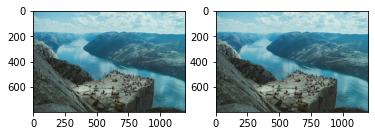

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math

fread = '/content/drive/MyDrive/NN/VOC2012/TestImages/pic.png'
fwrite = '/content/drive/MyDrive/NN/VOC2012/TestImages/stegomod.png'

lam = 0.9

#чтение файла
img = mpimg.imread(fread)
img = np.copy(img)
plt.subplot(1,2,1)
plt.imshow(img)
#plt.show()

#задание последовательности
mess = '"Do not you feel a great inclination, Miss Bennet, to seize such an opportunity of dancing a reel?"'
#mess = 'dancing a reel'
bits=''
for ch in mess:
  bits+=format(ord(ch), "08b")
print(mess)

print(len(mess), "символов ->", len(bits), "бит")
print("размер изображения -> (" ,img.shape[0], "x", img.shape[1], ")")

l = len(bits)
w = img.shape[1]
h = img.shape[0]

# кодирование
rseq = []
random.seed(9181)
for i in range(l):
  x = random.randint(0, w-1)
  y = random.randint(0, h-1)

  while [x,y] in rseq:
    x = random.randint(0, w-1)
    y = random.randint(0, h-1)
  
  rseq.append([x, y])

  Lxy = img[y,x,0]*0.299+img[y,x,1]*0.587+img[y,x,2]*0.114
  
  if bits[i] == '0':
    img[y,x,2]+=lam*Lxy
    if img[y,x,2] > 1:
      img[y,x,2] = 1
  else:
    img[y,x,2]-=lam*Lxy
    if img[y,x,2] < 0:
      img[y,x,2] = 0

  #print(i, " x = ", x, ", y = ", y)
  #img[y,x,0]=0
  #img[y,x,1]=0
  #img[y,x,2]=0

plt.subplot(1,2,2)
plt.imshow(img)
plt.show()

plt.imsave(fwrite, img)


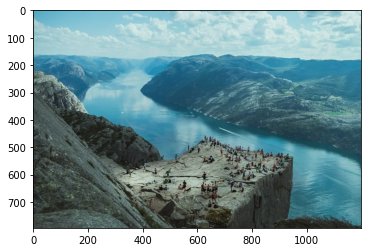

<<<RESULTS>>>
['00100010', '01000100', '01101111', '00100000', '01101110', '01101111', '01110100', '00100000', '01111001', '01101111', '01110101', '00100000', '01100110', '01100101', '01100101', '01101100', '00100000', '01100001', '00100000', '01100111', '01110010', '01100101', '01100001', '01110100', '00100000', '01101001', '01101110', '01100011', '01101100', '01101001', '01101110', '01100001', '01110100', '01101001', '01101111', '01101110', '00101100', '00100000', '01001101', '01101001', '01110011', '01110011', '00100000', '01000010', '01100101', '01101110', '01101110', '01100101', '01110100', '00101100', '00100000', '01110100', '01101111', '00100000', '01110011', '01100101', '01101001', '01111010', '01100101', '00100000', '01110011', '01110101', '01100011', '01101000', '00100000', '01100001', '01101110', '00100000', '01101111', '01110000', '01110000', '01101111', '01110010', '01110100', '01110101', '01101110', '01101001', '01110100', '01111001', '00100000', '01101111', '01100110', '

In [ ]:
img_a = mpimg.imread(fwrite)
img_a = np.copy(img_a)

imgplot = plt.imshow(img_a)
plt.show()

l_a = len(rseq) # 128 # число навскидку
w_a = img_a.shape[1]
h_a = img_a.shape[0]

bits_a = ""

#random.seed(9181)
for i in range(l_a):
#  x = random.randint(0, w_a-1)
#  y = random.randint(0, h_a-1)
  x = rseq[i][0]
  y = rseq[i][1]
  
  pos = [[-2, 0], [-1, 0], [1, 0], [2, 0], [0, -2], [0, -1], [0, 1], [0, 2]]
  pixels = []
  for k in range(len(pos)):
    if x+pos[k][0]>=0 and x+pos[k][0]<w_a and y+pos[k][1]>=0 and y+pos[k][1]<h_a:
      #print(x+pos[k][0], ";", y+pos[k][1])
      pixels.append(img_a[y+pos[k][1],x+pos[k][0],2])

  ist = sum(pixels)/len(pixels)
  iti = img_a[y, x, 2]

  if iti>=ist:
    bits_a+="0"
  else:
    bits_a+="1"

syms_a = [ bits_a[bit: bit+8] for bit in range(0, len(bits_a), 8) ]
syms = [ bits[bit: bit+8] for bit in range(0, len(bits), 8) ]


print("<<<RESULTS>>>")
print(syms)
print(syms_a)

mess_a = ""
mess = ""
for i in range(len(syms_a)):
  mess_a +=chr(int(syms_a[i], 2))
  mess +=chr(int(syms[i], 2))

print("Начальное сообщение: ", mess)
print(" Итоговое сообщение: ", mess_a)

Изображения


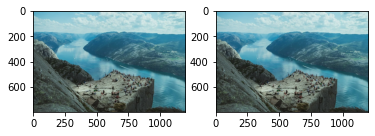

Метрики
PSNR
5.378770435336848e-10
MSE
0.002046182506415813
UQI
0.9993374938117975


In [ ]:
# Метрики для изображений

img_empty = mpimg.imread(fread)
img_empty = np.copy(img_empty)

img = img[:,:,0:3]
img_empty = img_empty[:,:,0:3]

print("Изображения")

plt.subplot(1,2,2)
plt.imshow(img_empty)

plt.subplot(1,2,1)
plt.imshow(img)
plt.show()

w = img.shape[1]
h = img.shape[0]

print("Метрики")

PSNR = 1 / (w * h) * ((np.max(img_empty) ** 2) / ((np.sum(img_empty - img)) ** 2))
print("PSNR")
print(PSNR)

MSE = 1 / (w * h) * ((np.sum(img_empty-img)) ** 2)
print("MSE")
print(MSE)

mn_i = np.mean(img)
mn_ie = np.mean(img_empty)

sig_i = np.sum((img-mn_i)*(img-mn_i))/(w*h*3) #np.var(img)
sig_ie = np.sum((img_empty-mn_ie)*(img_empty-mn_ie))/(w*h*3) #np.var(img_empty)
sig_iie = np.sum((img_empty-mn_ie)*(img-mn_i))/(w*h*3) #np.sum((img_empty-mn_ie)*(img-mn_i))*1/(w*h*3)
UQI =  sig_iie/(sig_i**(1/2)*sig_ie**(1/2))*2*mn_ie*mn_i/(mn_ie**2+mn_i**2)*2*sig_iie/(sig_ie+sig_i)
print("UQI")
print(UQI)